In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, recall_score, precision_score,f1_score,roc_auc_score
from xgboost import XGBClassifier

In [58]:
data = pd.read_csv('../data/raw/creditcard.csv.zip')
pd.options.display.max_columns = 32
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
fraud = data.loc[data['Class'] == 1]
not_fraud= data.loc[data['Class'] == 0]

In [11]:
print([i for i in data.columns if i!= 'Class'])

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


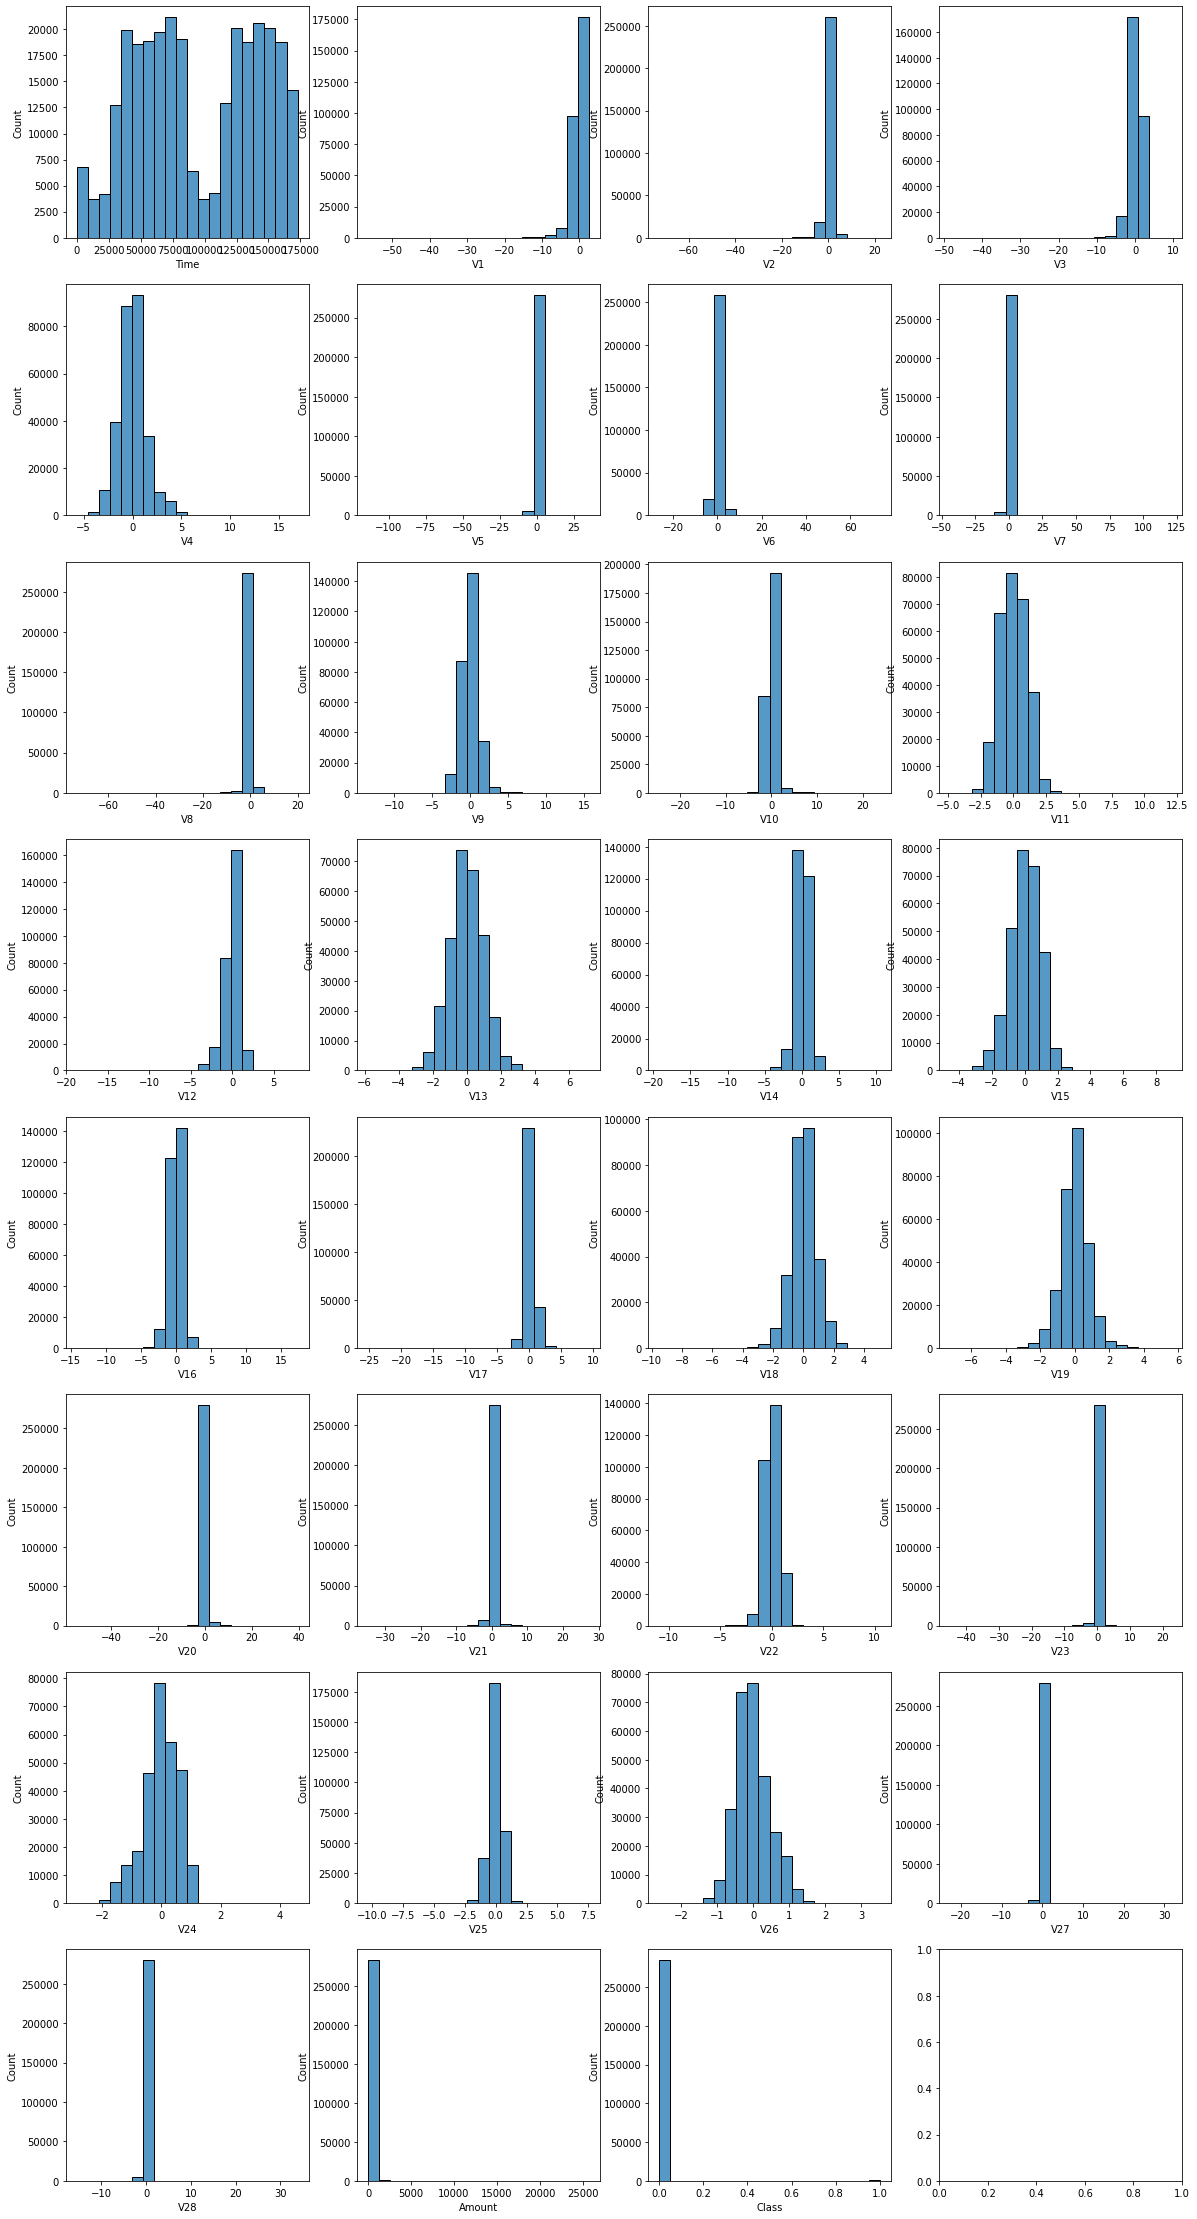

In [12]:
fig, axes = plt.subplots(8, 4, figsize=(20, 40))
i = 0
j = 0
for vars in data.columns :
    sns.histplot(data = data, x = vars, bins = 20, ax = axes[i,j])
    j = j + 1
    if j == 4 :
        i = i + 1
        j = 0
# hist =sns.histplot(data=data,x=data.Time,hue=data.Class)


<AxesSubplot:>

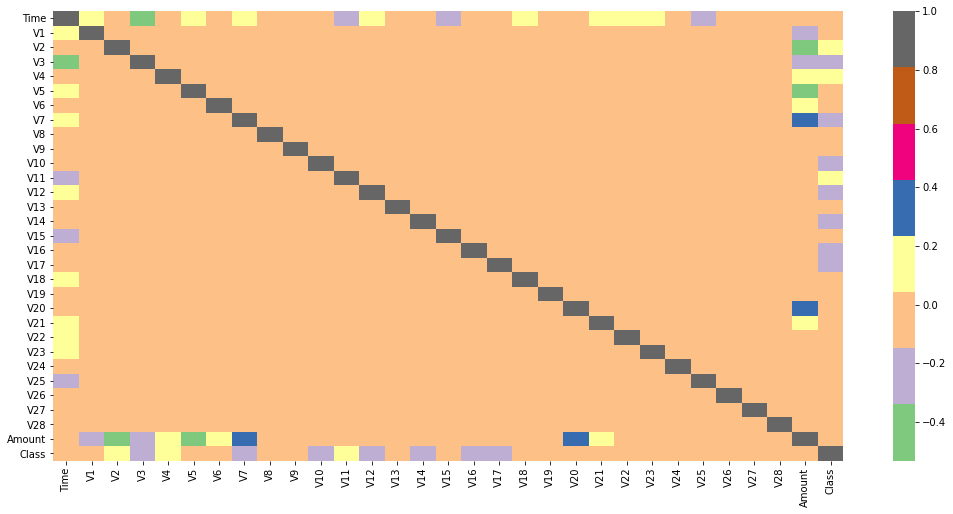

In [13]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = 17.7,8.27
mat_corr = data.corr()
sns.heatmap(mat_corr,cmap='Accent')

In [14]:
mat_corr['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

Text(0, 0.5, 'Probability Density')

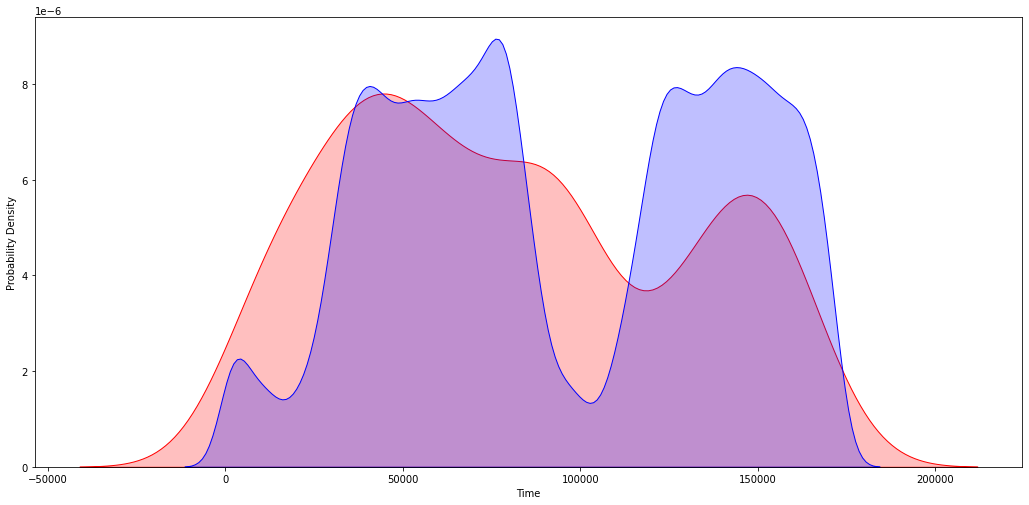

In [15]:
# sns.scatterplot(data=data,x='Time',y='Amount',hue='Class')
sns.kdeplot(fraud['Time'], color='r', shade=True, label='fraud')
sns.kdeplot(not_fraud['Time'], color='b', shade=True, label='fraud')  
plt.ylabel('Probability Density')

In [16]:
for cols in data.columns:
    print(cols,data[f'{cols}'].skew())

Time -0.0355676180063216
V1 -3.2806673027560405
V2 -4.624865573285336
V3 -2.2401554402404193
V4 0.676292097985747
V5 -2.425901495952054
V6 1.826580664998085
V7 2.553907417429514
V8 -8.521944194777976
V9 0.5546797719063509
V10 1.1871405899625278
V11 0.35650585548882013
V12 -2.278400935410618
V13 0.06523345790658323
V14 -1.9951758402683304
V15 -0.3084229821359239
V16 -1.100966276051066
V17 -3.8449144738706202
V18 -0.25988026809430603
V19 0.10919175998147104
V20 -2.037155299081399
V21 3.5929911930778453
V22 -0.21325762284328822
V23 -5.875140340106818
V24 -0.5524993011673045
V25 -0.4157925903156351
V26 0.5766926172084218
V27 -1.1702089424327133
V28 11.19209119221281
Amount 16.977724453761024
Class 23.99757931064749


In [17]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [72]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range
final_df = data.copy()
final_df = final_df.drop(['Class','Amount'],axis=1)
final_df_cols = [i for i in final_df.columns]
print(final_df_cols)

for i in final_df_cols:
    low, upp = remove_outlier(final_df[f'{i}'])
    final_df[f'{i}'] = np.where(final_df[f'{i}']>upp,
                                   upp,final_df[f'{i}'])
    final_df[f'{i}'] = np.where(final_df[f'{i}']<low ,
                                   low,final_df[f'{i}'])

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [73]:
final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-1.955036,1.109969,-0.121359,-1.829171,0.524980,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [74]:
final_df['Class'] = data['Class']
final_df['Amount'] = data['Amount']
final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-1.955036,1.109969,-0.121359,-1.829171,0.524980,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,69.99


In [75]:
final_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.075523,0.050096,0.027167,-0.027804,-0.002713,-0.090793,0.008770,0.068568,-0.015409,-0.030334,-0.003346,0.040163,-0.001165,0.023520,0.002393,0.012882,-0.004512,0.003753,-0.004027,-0.028178,-0.015137,0.001837,-0.004642,0.002113,0.003745,-0.004052,0.012651,0.011145,0.001727,88.349619
std,47488.145955,1.594770,1.122065,1.370364,1.310659,1.077212,1.002595,0.865176,0.485609,1.018357,0.824799,1.002988,0.843976,0.984074,0.784755,0.903951,0.806196,0.673635,0.801888,0.758936,0.317830,0.323950,0.707380,0.266946,0.594299,0.492923,0.467712,0.165202,0.124311,0.041527,250.120109
min,0.000000,-4.274396,-2.701961,-3.766705,-3.236612,-2.646882,-2.518586,-2.240844,-1.012593,-2.503452,-2.019449,-3.015626,-1.941286,-2.615106,-1.803660,-2.430442,-1.955036,-1.808883,-1.998335,-1.829171,-0.728865,-0.850553,-2.148706,-0.626079,-1.545755,-1.318936,-1.178888,-0.313667,-0.249819,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,0.000000,5.600000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,0.000000,22.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,0.000000,77.165000
max,172792.000000,2.454930,2.907135,3.903536,3.131313,2.567212,2.148856,2.257204,1.131309,2.457494,1.937947,2.992725,2.153952,2.629071,1.871236,2.496378,2.010296,1.724810,2.000292,1.831822,0.650184,0.808535,2.134910,0.611875,1.630696,1.352506,1.092856,0.333872,0.275140,1.000000,25691.160000


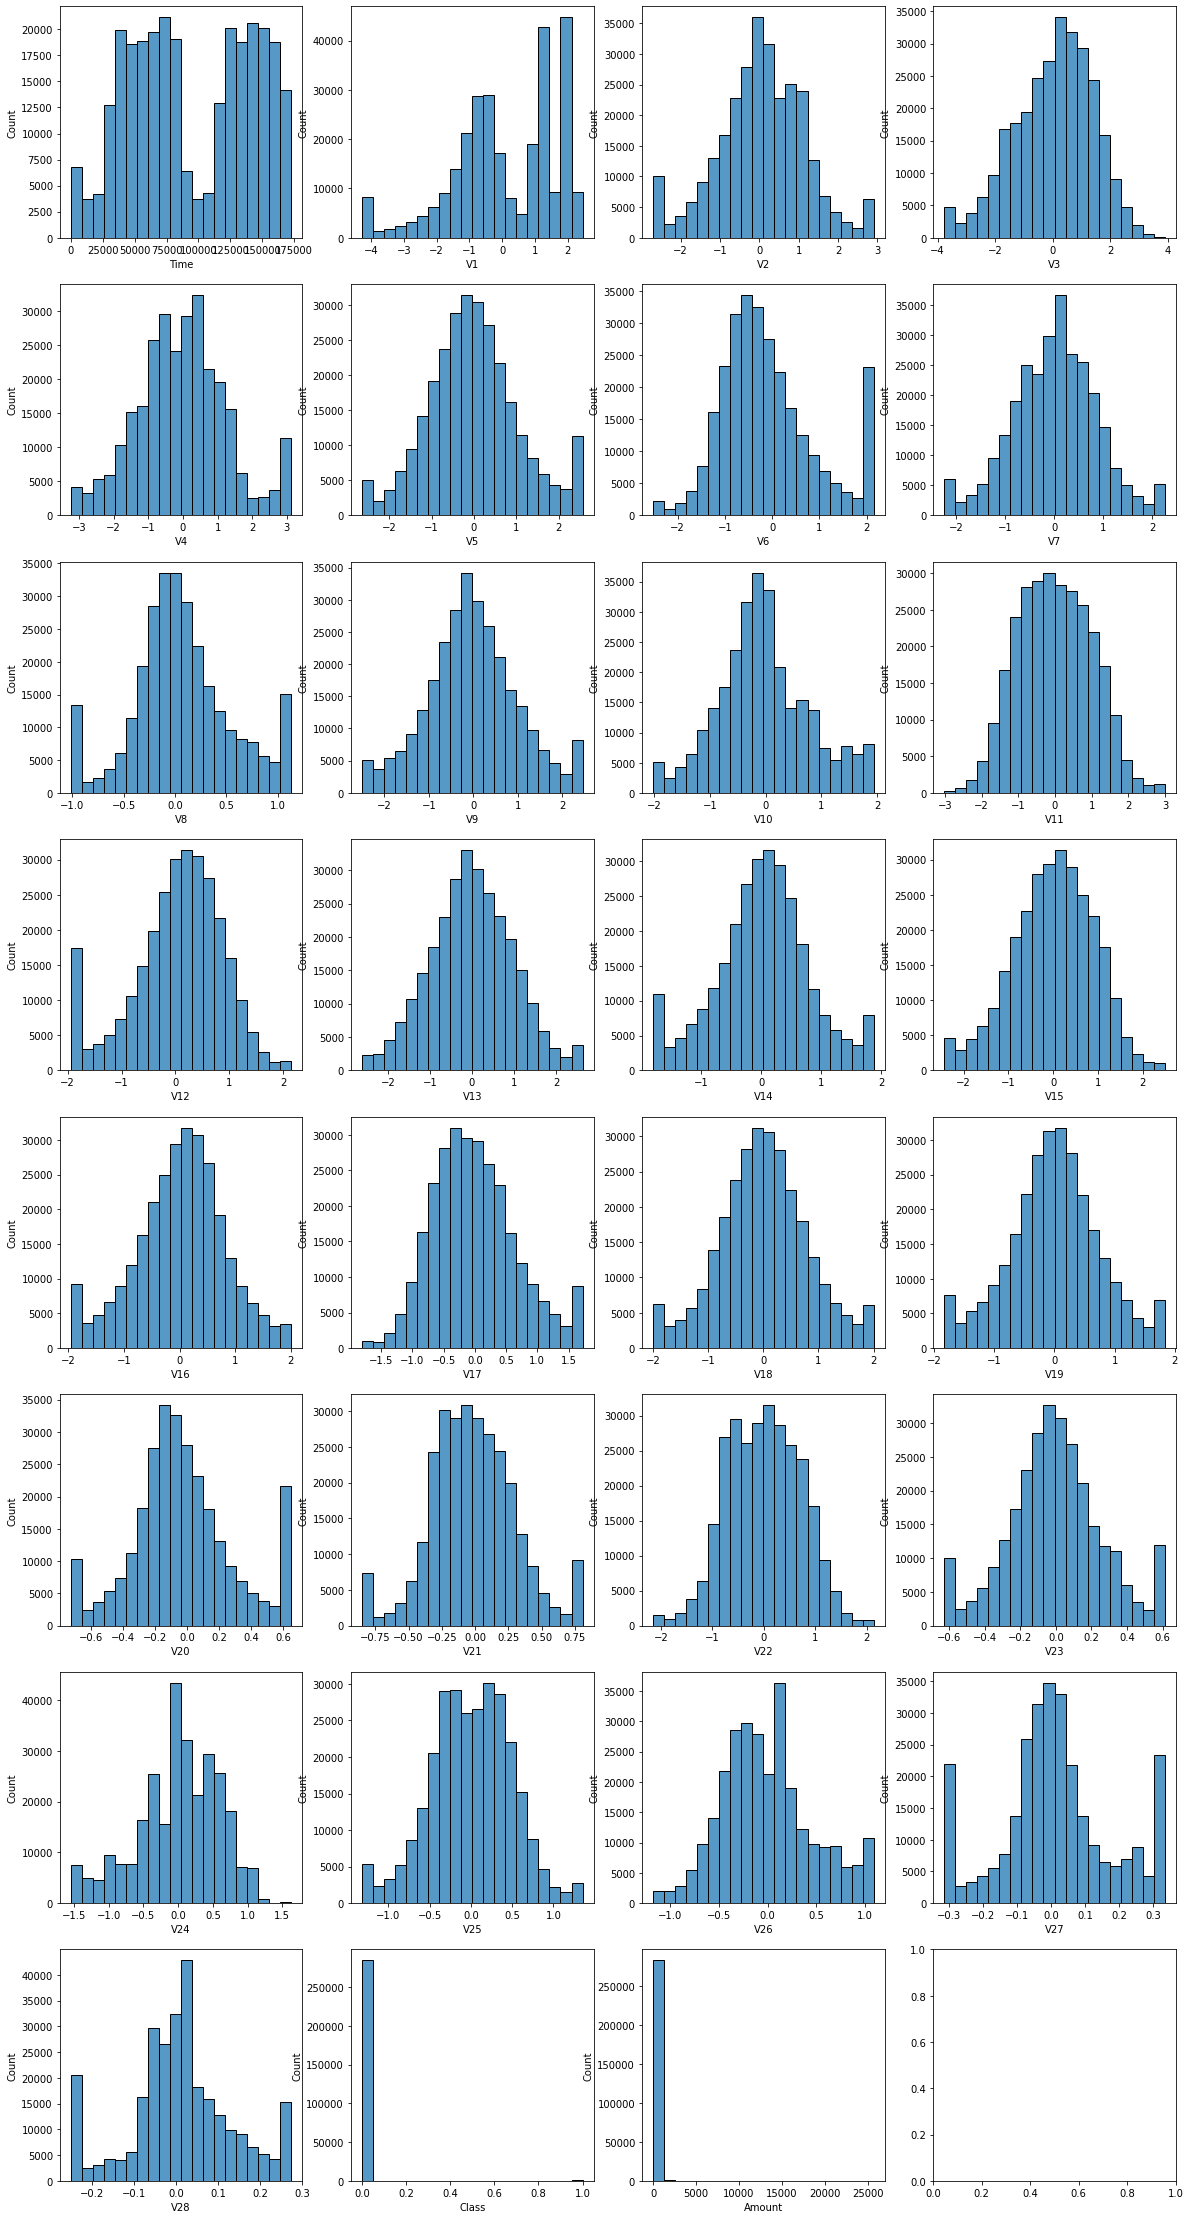

In [76]:
fig, axes = plt.subplots(8, 4, figsize=(20, 40))
i = 0
j = 0
for vars in final_df.columns :
    sns.histplot(data = final_df, x = vars, bins = 20, ax = axes[i,j])
    j = j + 1
    if j == 4 :
        i = i + 1
        j = 0
# hist =sns.histplot(data=data,x=data.Time,hue=data.Class)


In [77]:
for cols in final_df.columns:
    print(cols,final_df[f'{cols}'].skew())

Time -0.0355676180063216
V1 -0.6451654102744244
V2 -0.13265837910622488
V3 -0.405489038731145
V4 0.1873612223739726
V5 0.22627245073103333
V6 0.6655322490418317
V7 -0.06147445573659458
V8 0.15451438388017072
V9 0.10014352422641032
V10 0.24401447435953152
V11 0.10610306811446733
V12 -0.5671504815628164
V13 0.039888646862626956
V14 -0.10265836811936095
V15 -0.2620080695373384
V16 -0.23180275306207426
V17 0.4433445331003161
V18 0.010783226799798398
V19 -0.03637109735067358
V20 0.2886605585531388
V21 0.12121827470706287
V22 -0.036728367321187096
V23 0.061818290135163566
V24 -0.5440481354103767
V25 -0.1562563174892951
V26 0.36485371987092463
V27 0.08280349128762546
V28 -0.034096599885864845
Class 23.99757931064749
Amount 16.977724453761024


In [78]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = 17.7,8.27
final_df_mat_corr = final_df.corr()
final_df_mat_corr['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.096491
V4        0.083385
V2        0.067842
V21       0.047871
V27       0.031643
V19       0.027138
V8        0.027037
V20       0.025264
V28       0.023358
Amount    0.005632
V25       0.004674
V26       0.004415
V22       0.002126
V23      -0.003791
V15      -0.003825
V13      -0.004488
V24      -0.007371
Time     -0.012323
V5       -0.041329
V6       -0.046448
V18      -0.049377
V1       -0.057870
V9       -0.064086
V17      -0.070546
V16      -0.070547
V7       -0.071433
V10      -0.082732
V12      -0.083688
V14      -0.086499
V3       -0.088856
Name: Class, dtype: float64

<AxesSubplot:xlabel='Time', ylabel='Amount'>

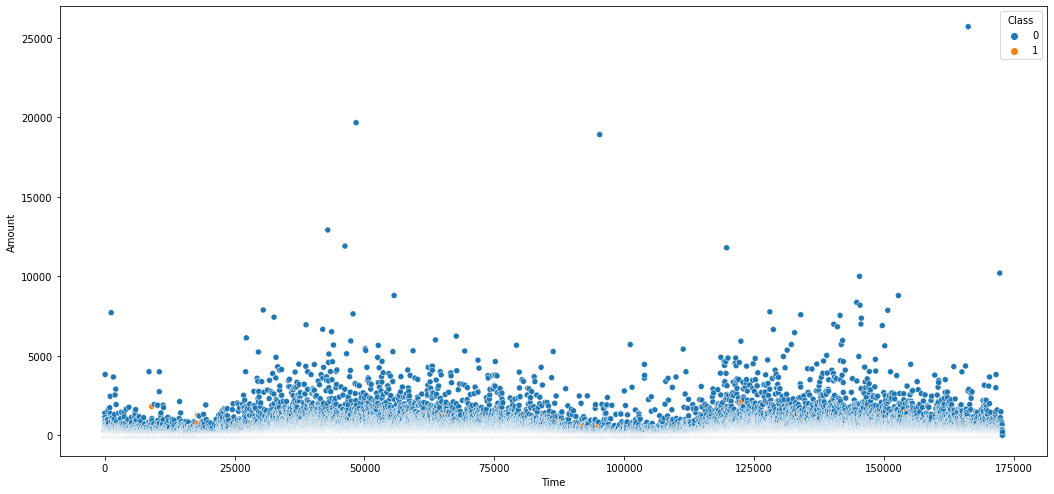

In [79]:
# sns.scatterplot(data=data,x=data.Time,y=data.Amount,hue=data.Class)
sns.scatterplot(data=final_df,x='Time',y='Amount',hue=final_df.Class)

In [80]:
def strat_split(df,target,test_size,seed):
        
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
    for train_index, test_index in split.split(df, df[f"{target}"]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]
    return strat_train_set,strat_test_set

In [25]:
class_vals = data['Class'].value_counts()
print(class_vals)
# ax = sns.barplot(x=cyl_vals.index,y = cyl_vals.values,data=data)
# ax.set(xlabel='count', ylabel='no of cylinders')


0    284315
1       492
Name: Class, dtype: int64


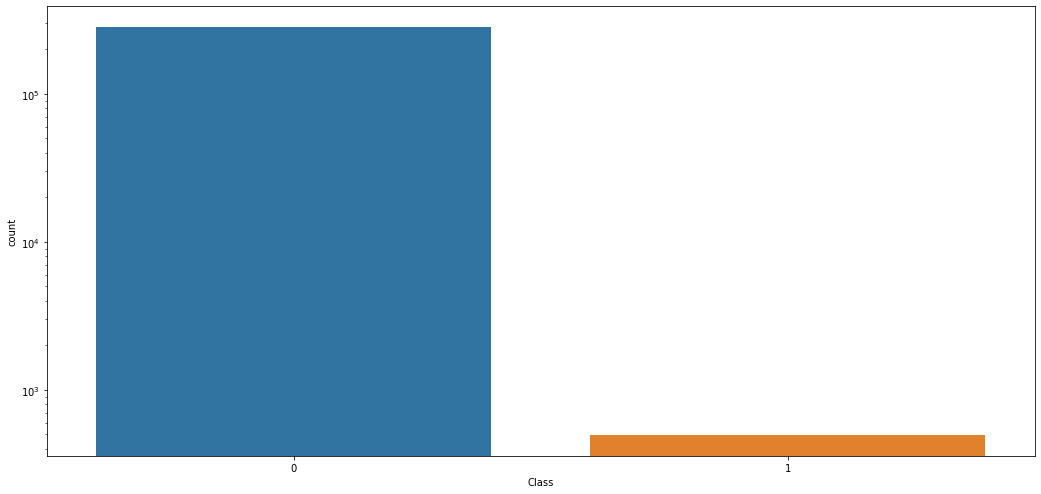

In [26]:
g = sns.countplot(x='Class',data=data)
g.set_yscale("log")
# g.set_ylim(0.05, 1000)

In [27]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [28]:
# data_test = final_df.copy()

In [29]:
train_data,val_df = strat_split(data,'Class',0.2,42)
print(train_data.shape,val_df.shape)
train_data_class_vals = train_data['Class'].value_counts()
val_class_vals = val_df['Class'].value_counts()
print(train_data_class_vals)
print(val_class_vals)

(227845, 31) (56962, 31)
0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


In [30]:
# train_data = train_data.reset_index(drop=True)
# train_data.head()
train_data = train_data.reset_index(drop=True)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [31]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range
final_df = train_data.copy()
final_df_cols = [i for i in final_df.columns][:-1]

for i in final_df_cols:
    low, upp = remove_outlier(final_df[f'{i}'])
    final_df[f'{i}'] = np.where(final_df[f'{i}']>upp,
                                   upp,final_df[f'{i}'])
    final_df[f'{i}'] = np.where(final_df[f'{i}']<low ,
                                   low,final_df[f'{i}'])

In [32]:
data_test = final_df.copy()

In [33]:
train_df,test_df = strat_split(data_test,'Class',0.2,42)
print(train_df.shape,test_df.shape)
train_class_vals = train_df['Class'].value_counts()
test_class_vals = test_df['Class'].value_counts()
print(train_class_vals)
print(test_class_vals)

(182276, 31) (45569, 31)
0    181961
1       315
Name: Class, dtype: int64
0    45490
1       79
Name: Class, dtype: int64
